Importing Libraries

In [1]:
import torch
import os

from captioner import Captioner

Setting up directories, devices, and config files

In [2]:
MODEL_DIR = 'model_weights'

DETECTRON_CFG_FILE = \
    'detectron2/configs/COCO-Detection/faster_rcnn_X_101_64x4d_FPN_2x_vlp.yaml'

BERT_CFG_FILE = 'VLP/configs/bert_for_captioning.json'

OBJ_VOCAB_FILE = 'vocab/objects_vocab.txt'

# For 99% of environments the below is correct, this demo requires an NVIDIA GPU & CUDA
CPU_DEVICE = torch.device('cpu')
GPU_DEVICE = torch.device('cuda:0')

Now we need to know where to find the pretrained weights for both the detector and bert decoder

In [3]:
detector_weights_path = \
    os.path.join(MODEL_DIR, 'detectron/e2e_faster_rcnn_X-101-64x4d-FPN_2x-vlp.pkl')

bert_weights_path = os.path.join(MODEL_DIR, 'bert/model.19.bin')

Finally we can now create a Captioner object

In [4]:
captioner = Captioner(DETECTRON_CFG_FILE, detector_weights_path, BERT_CFG_FILE, 
                      bert_weights_path, OBJ_VOCAB_FILE, CPU_DEVICE, GPU_DEVICE)

Now that the captioner object is loaded and initialized, we can caption any image on the internet if you have the URL by calling the captioner object on the URL ...

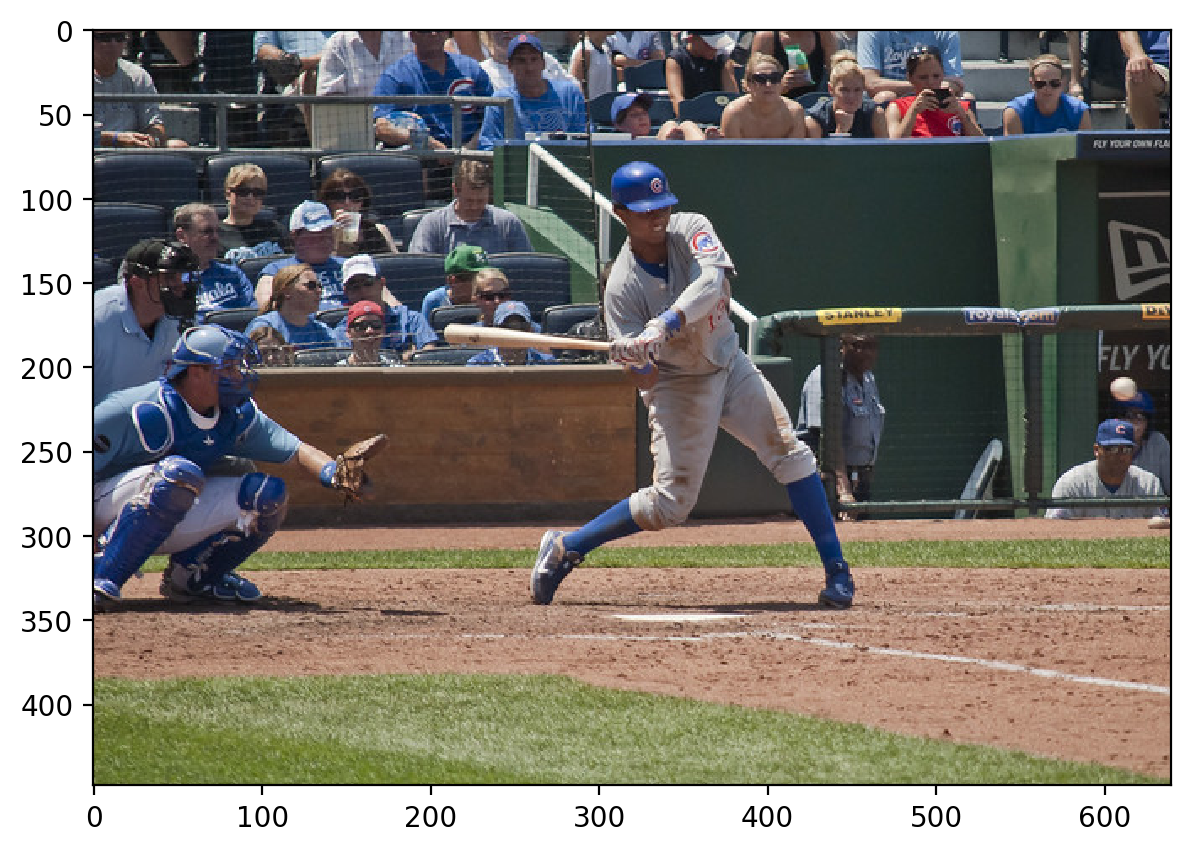

'A baseball player swinging a bat on a baseball field.'

In [5]:
captioner("https://farm7.staticflickr.com/6055/5879954084_9cab839621_z.jpg")

Hmmm, that's all well and good but it would be nice to see what the Neural Network "sees", no problem! we can turn on visualization with the visualize flag

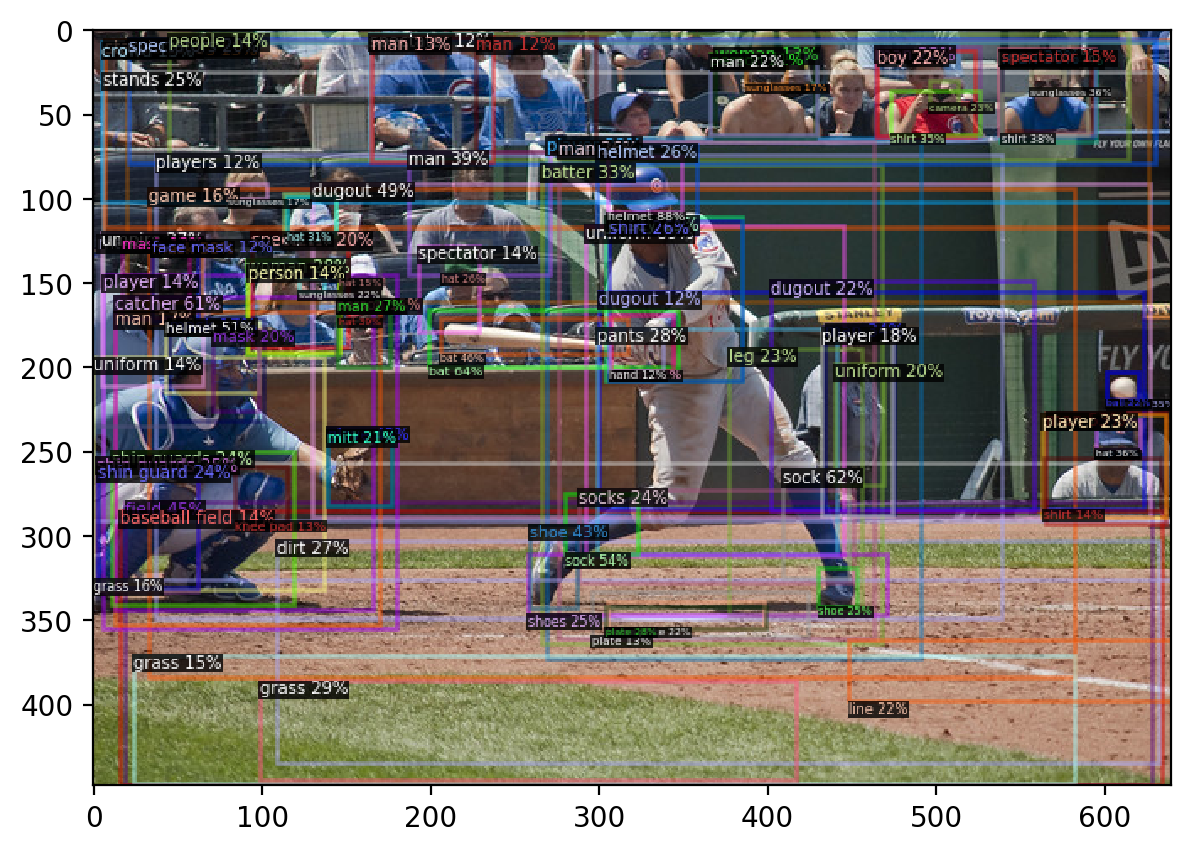

'A baseball player swinging a bat on a baseball field.'

In [6]:
captioner("https://farm7.staticflickr.com/6055/5879954084_9cab839621_z.jpg", visualize=True)

Ahhhh TMI (Too much information), our human brains can't handle that much information, let's cool it down a bit and just show the most important parts

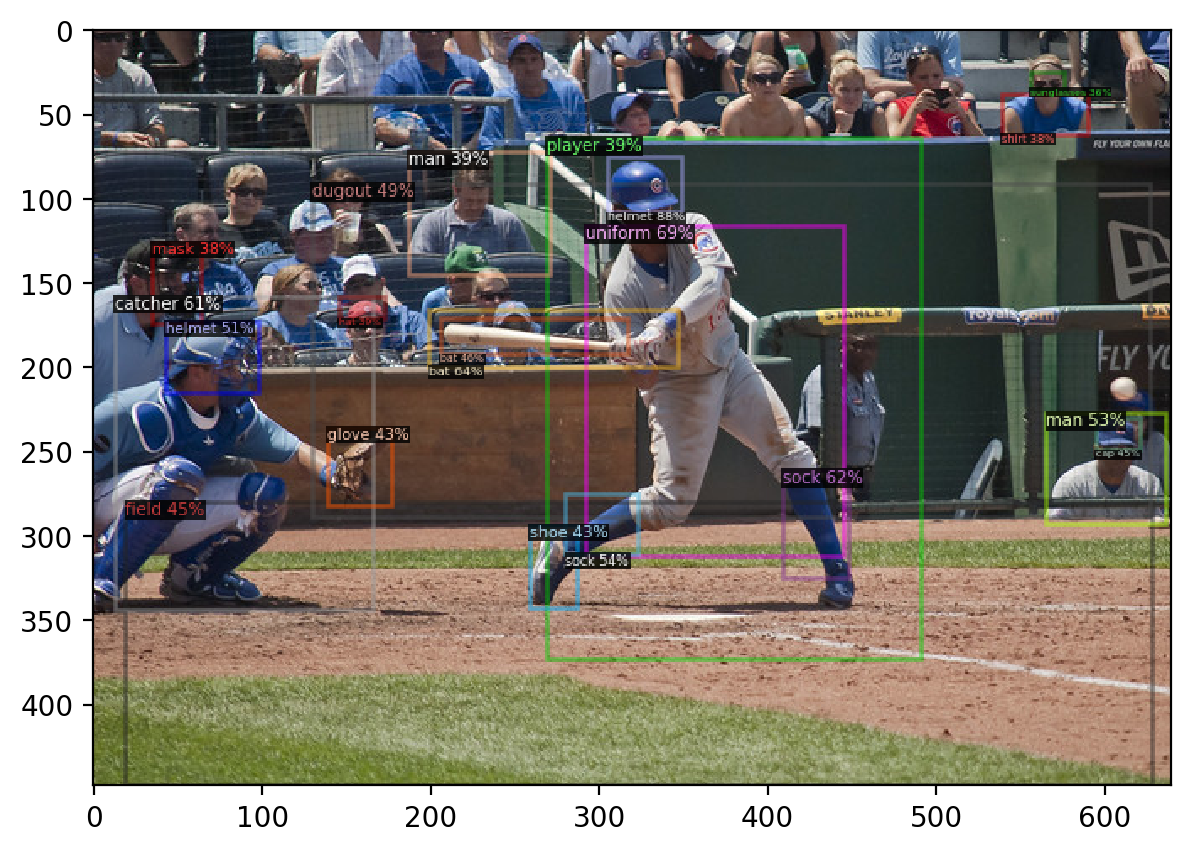

'A baseball player swinging a bat on a baseball field.'

In [7]:
captioner("https://farm7.staticflickr.com/6055/5879954084_9cab839621_z.jpg", visualize=True, 
          viz_top_n=20)

The Neural Network still uses the top 100 ROI's (Regions of Interest) to inform itself, this is just a simplication for humans so that's why it does not affect the produced caption.

What if for some reason I don't find captions that cool and just want the visualization? No Problem! Just call the visualize method (but you need to update your definition of cool)

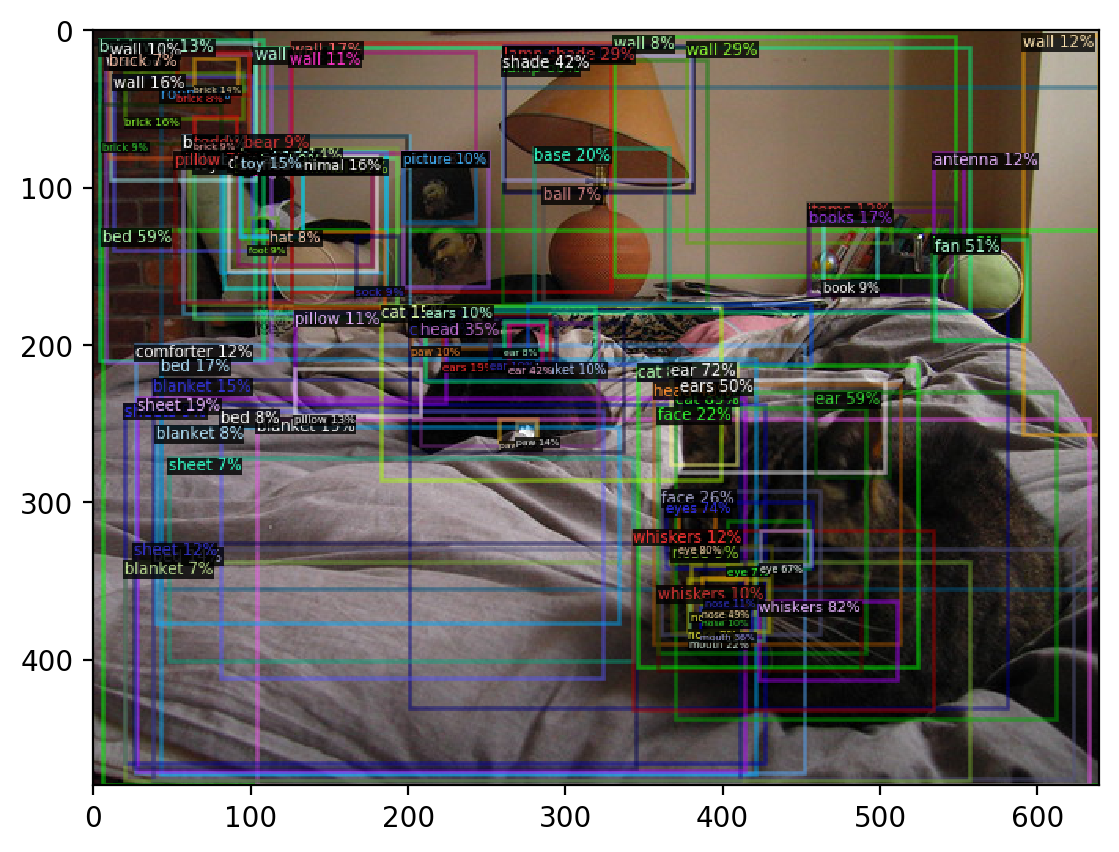

In [8]:
captioner.visualize("https://farm3.staticflickr.com/2126/2477980717_d1ff279984_z.jpg")

Ahh TMI again, I'm guessing we can reduce this as well?

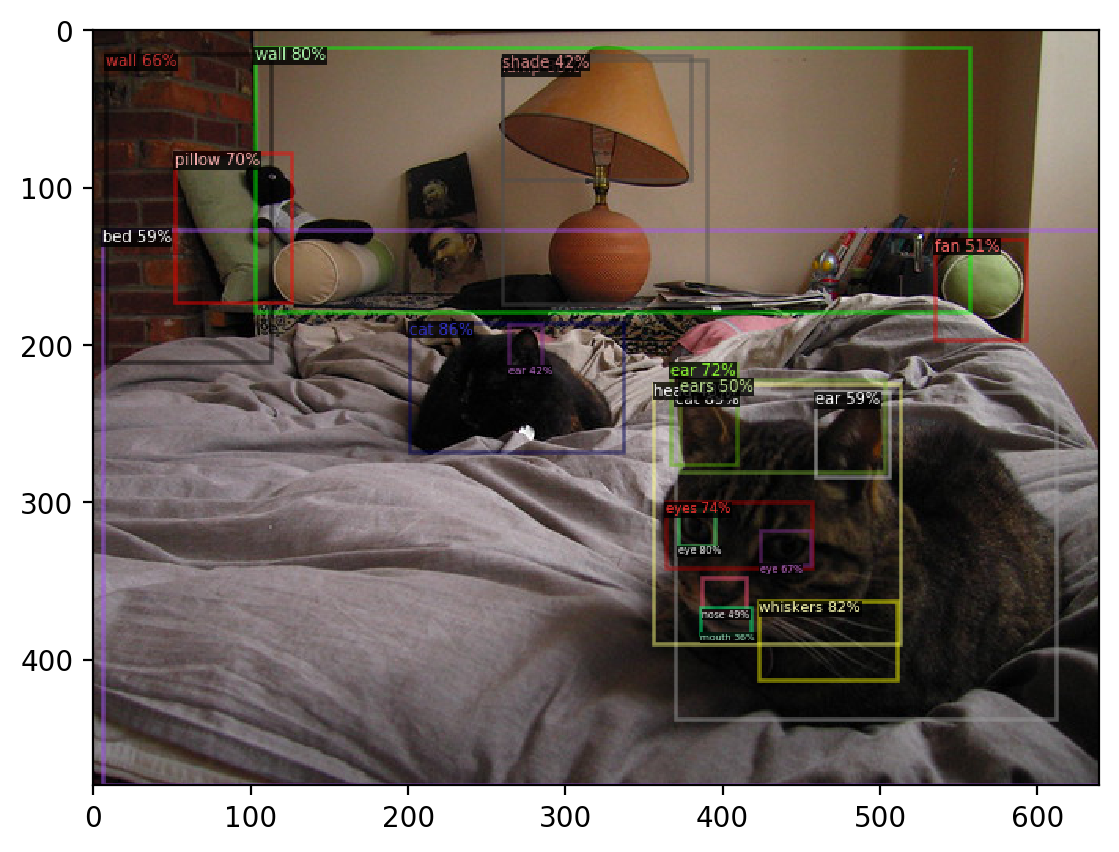

In [9]:
captioner.visualize("https://farm3.staticflickr.com/2126/2477980717_d1ff279984_z.jpg", 
                    top_n=20)

What if I captioned something and changed my mind and wanted the visualization or to change the top number of ROIs to show?

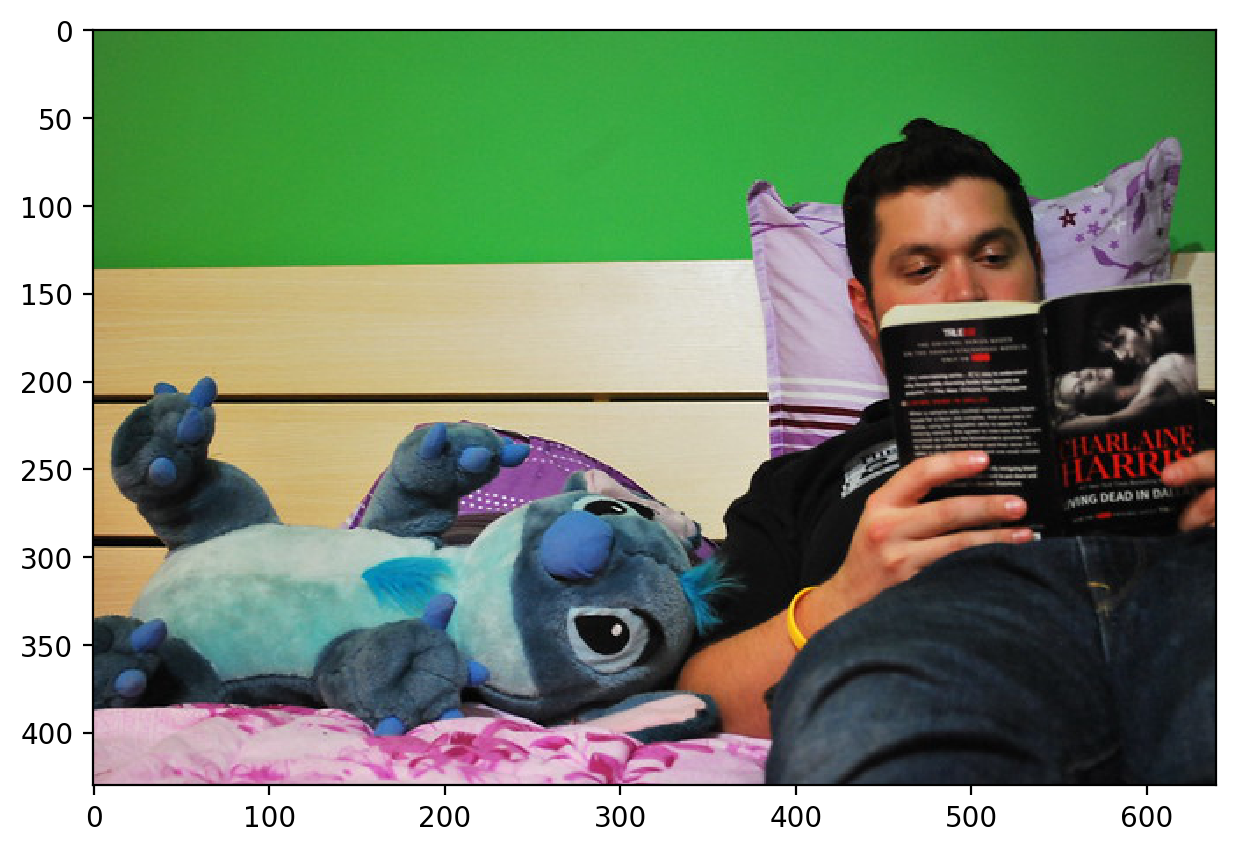

'A man reading a magazine of a cat on a bed with a toy blue and white cat.'

In [10]:
#  The last run captioning or visualization is cached so just call visualize with no 
#  URL/filepath and change the top_n value to what you need

captioner("https://farm3.staticflickr.com/2468/4016197796_592dfd3183_z.jpg")

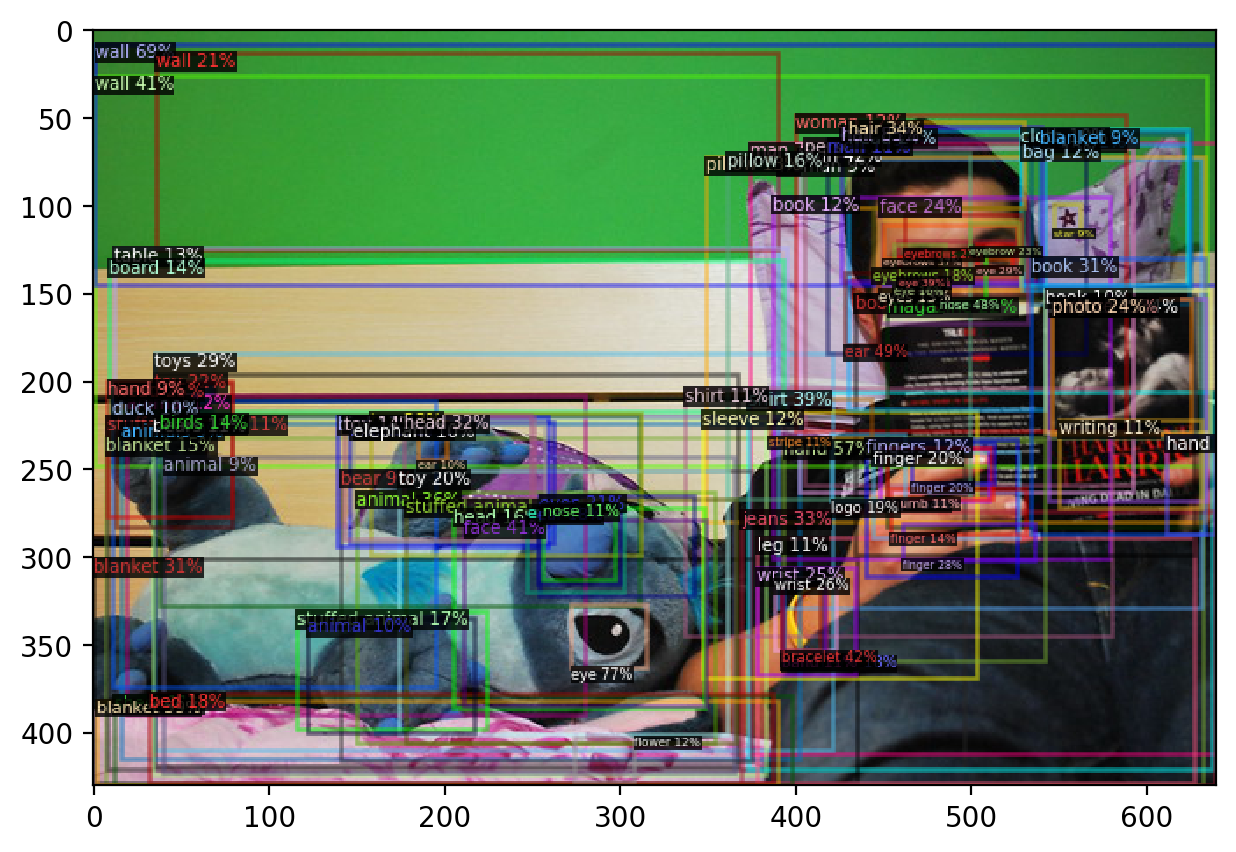

In [11]:
#  I guess the vocabulary is a little limited.... stitch is a cat!

captioner.visualize()

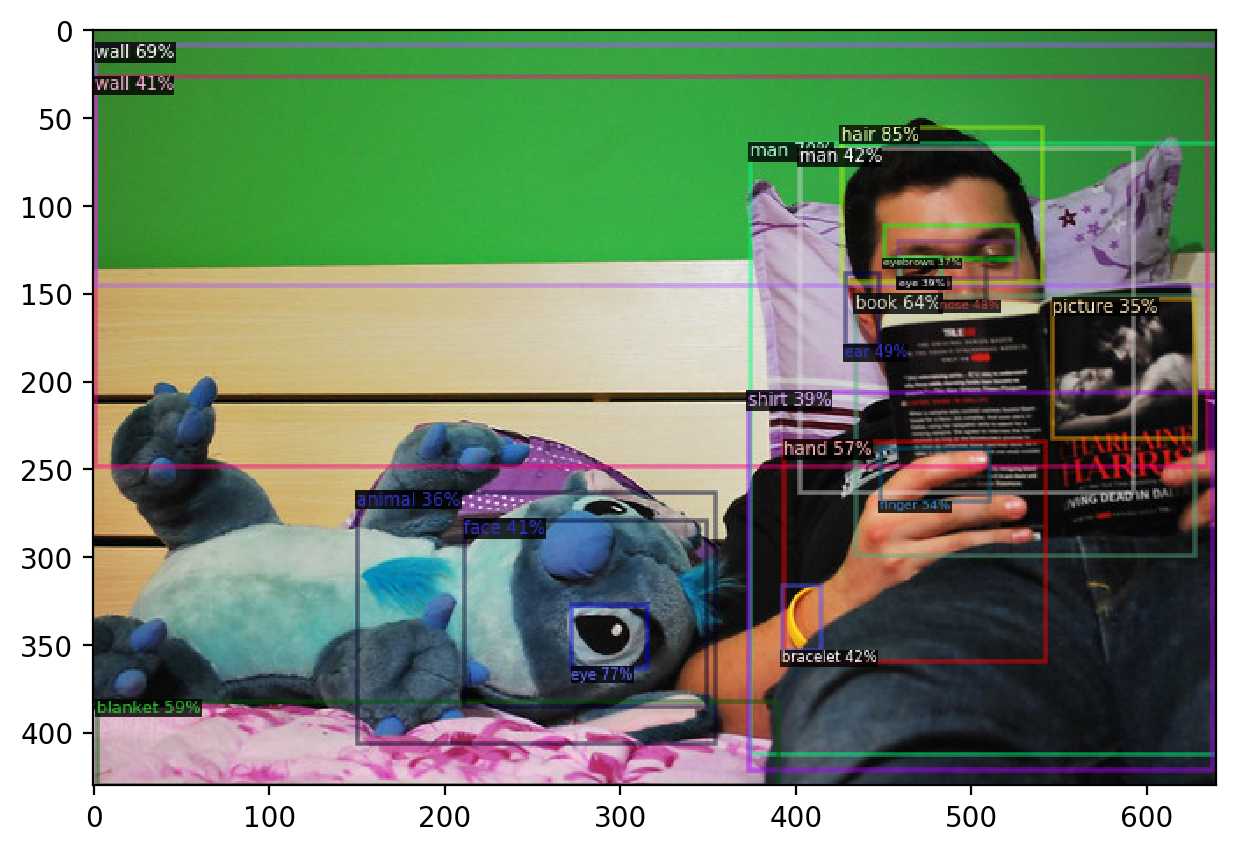

In [12]:
captioner.visualize(top_n=20)

I mean.. access to any image url on the internet is great and all but I want to caption a file OFF the cloud

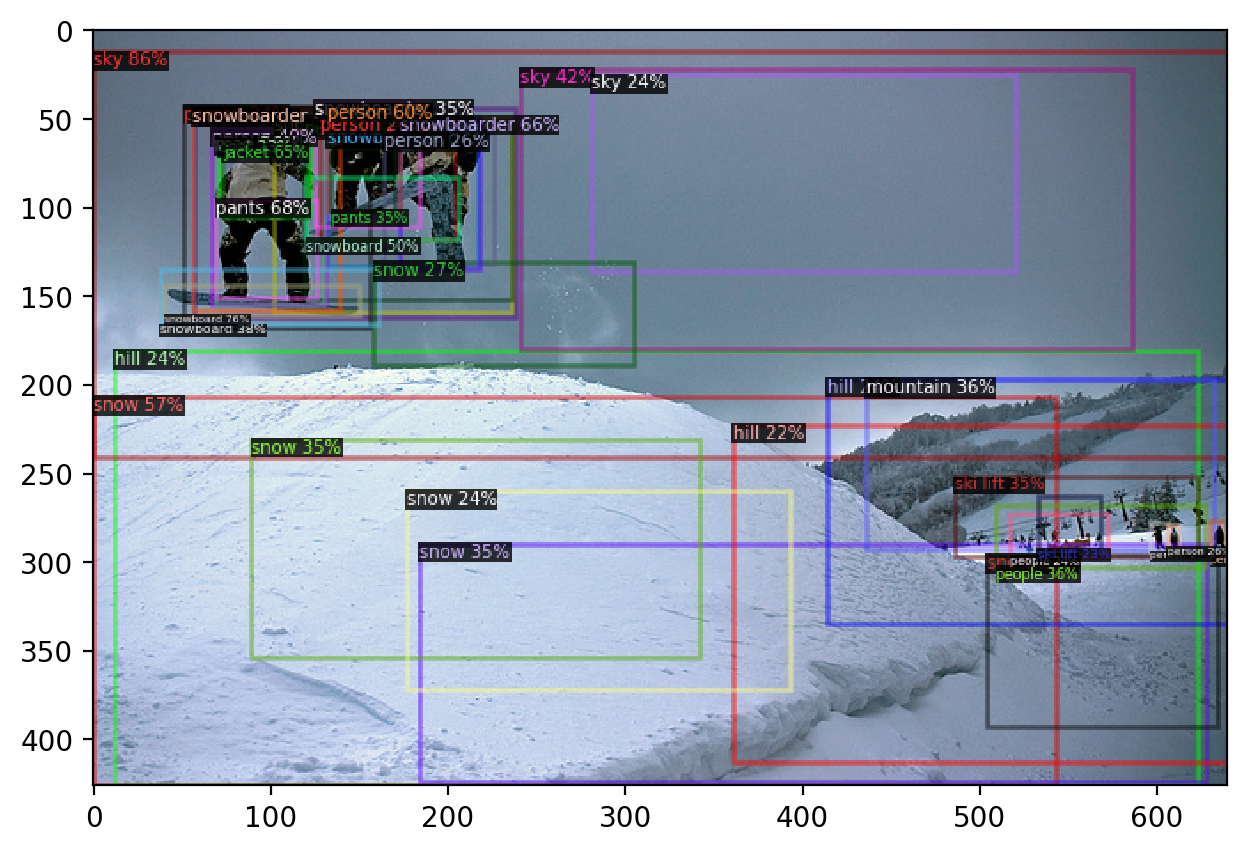

'A group of snowboarders riding down a snowy hill.'

In [13]:
#  Filepaths are perfectly welcomed (assuming your jupyter has access) Change for your local 
#  file system
captioner('/home/pky/Datasets/coco/train2014/COCO_train2014_000000082143.jpg', visualize=True, 
          viz_top_n=40)